# Bayesian Modeling and Prediction for Movies

<img src="images/moviesd.png"/>

## Part 1: Data

### Sample
The sample data set is comprised of 651 randomly sampled movies produced and released before 2016. Some of the variables provide descriptive information that would not be use full in a data exploration or a linear regression analysis. For example:  Title of the movie, link to IMDB or link to rottentomatoes.

### Methodology
The data collection methodology is not explicitly stated, but it is evident that the data is purely observational. Random sampling was involved but random assignement of treatment was not done therefore we cannot make any causality study. Only generalization is allowed for the conclusion reached in this analysis.

### Load Libraries

In [1]:
#install.packages("package")
library(ggplot2)
library(dplyr)
library(statsr)
library(BAS)
library(gridExtra)
library(tidyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




### Load Data

In [2]:
load("data/movies.Rdata")
head(movies)

title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,⋯,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
<chr>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Filly Brown,Feature Film,Drama,80,R,Indomina Media Inc.,2013,4,19,2013,⋯,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
The Dish,Feature Film,Drama,101,PG-13,Warner Bros. Pictures,2001,3,14,2001,⋯,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
Waiting for Guffman,Feature Film,Comedy,84,R,Sony Pictures Classics,1996,8,21,2001,⋯,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
The Age of Innocence,Feature Film,Drama,139,PG,Columbia Pictures,1993,10,1,2001,⋯,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
Malevolence,Feature Film,Horror,90,R,Anchor Bay Entertainment,2004,9,10,2005,⋯,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/
Old Partner,Documentary,Documentary,78,Unrated,Shcalo Media Group,2009,1,15,2010,⋯,no,no,Chung-ryoul Lee,Choi Won-kyun,Lee Sam-soon,Moo,NA,NA,http://www.imdb.com/title/tt1334549/,//www.rottentomatoes.com/m/old-partner/


## Part 2: Data Manipulation

In addition to the existing variables in the dataset, we will now be adding the below set of variables to be used in modelling.

- feature_film: "yes" if title_type is "Feature Film", "no" otherwise
- drama: "yes" if genre is "Drama", "no" otherwise
- mpaa_rating_R: "yes" if mpaa_rating is "R", "no" otherwise
- oscar_season: "yes" if movie is released in November, October, or December (based on thtr_rel_month), "no" otherwise
- summer_season: "yes" if movie is released in May, June, July, or August (based on thtr_rel_month), "no" otherwise

In [3]:
movies <- movies %>% 
          mutate(feature_film=as.factor(ifelse(title_type == 'Feature Film', 'yes', 'no'))) %>%
          mutate(drama=as.factor(ifelse(genre == 'Drama', 'yes', 'no'))) %>%
          mutate(mpaa_rating_R=as.factor(ifelse(mpaa_rating == 'R', 'yes', 'no'))) %>%
          mutate(oscar_season=as.factor(ifelse(thtr_rel_month %in% c(10:12), 'yes', 'no'))) %>%
          mutate(summer_season=as.factor(ifelse(thtr_rel_month %in% c(5:8), 'yes', 'no')))

head(movies)

title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,⋯,actor3,actor4,actor5,imdb_url,rt_url,feature_film,drama,mpaa_rating_R,oscar_season,summer_season
<chr>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>
Filly Brown,Feature Film,Drama,80,R,Indomina Media Inc.,2013,4,19,2013,⋯,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/,yes,yes,yes,no,no
The Dish,Feature Film,Drama,101,PG-13,Warner Bros. Pictures,2001,3,14,2001,⋯,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/,yes,yes,no,no,no
Waiting for Guffman,Feature Film,Comedy,84,R,Sony Pictures Classics,1996,8,21,2001,⋯,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/,yes,no,yes,no,yes
The Age of Innocence,Feature Film,Drama,139,PG,Columbia Pictures,1993,10,1,2001,⋯,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/,yes,yes,no,yes,no
Malevolence,Feature Film,Horror,90,R,Anchor Bay Entertainment,2004,9,10,2005,⋯,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/,yes,no,yes,no,no
Old Partner,Documentary,Documentary,78,Unrated,Shcalo Media Group,2009,1,15,2010,⋯,Moo,NA,NA,http://www.imdb.com/title/tt1334549/,//www.rottentomatoes.com/m/old-partner/,no,no,no,no,no


## Part 3: Exploratory Data Analysis (EDA)

Let us begin by first constructing a subset from the original dataset by selecting the variables that will be used in modelling. Susequently we will remove the incomplete entries. Also, I will be constructing a new variable: oscar_win that will track weather actor, actress or director involved in the moview has had an oscar win.

* feature_film
* drama
* runtime
* mpaa_rating_R
* thtr_rel_year
* oscar_season
* summer_season
* imdb_rating
* imdb_num_votes
* critics_score
* best_pic_nom
* best_pic_win
* best_actor_win
* best_actress_win
* best_dir_win
* top200_box

In [4]:
mv <- movies %>% select(audience_score, feature_film, drama, runtime, mpaa_rating_R, thtr_rel_year, oscar_season, 
                        summer_season, imdb_rating, imdb_num_votes, critics_score, best_pic_nom, best_pic_win, 
                        best_actor_win, best_actress_win, best_dir_win, top200_box)

mv <- na.exclude(mv)

mv <- mutate(mv, oscar = ifelse(best_pic_nom == "yes", "yes", 
                                ifelse(best_pic_win == "yes", "yes",  
                                       ifelse(best_actor_win == "yes", "yes", 
                                              ifelse(best_actress_win == "yes", "yes", 
                                                     ifelse(best_dir_win == "yes", "yes", "no"))))))

Focusing our attention to the variables that we wish to explore further, we observe that there are two types of variables:

- Categorical variables with two factors: feature_film, drama, mpaa_rating_R, oscar_season, summer_season, oscar, and top200_box. Note that I am now having just one variable oscar instead of 5 variabled. This done because in the privious analysis of the dataset in the 'Linear Regression Module' we proved that using a proxy variable is a better approach.

- Continuous variables: runtime, imdb_rating, imdb_num_votes, and critics_score.

Now let us briefly explore theser variables

### Categorical Variables Exploration

Warning message:
"attributes are not identical across measure variables;
they will be dropped"


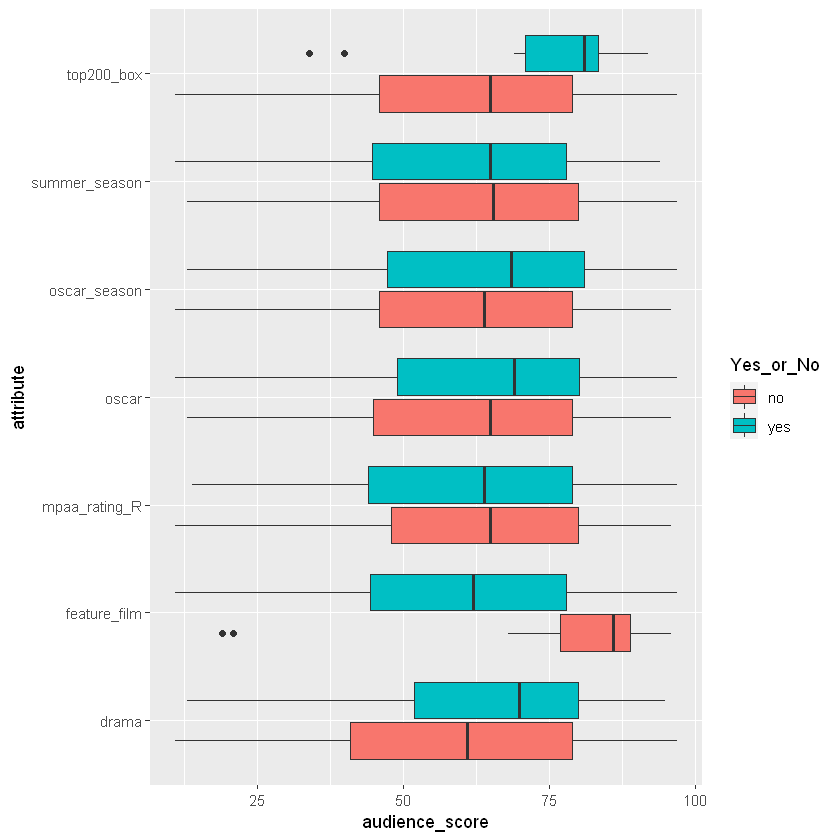

In [5]:
mv_cat <- mv %>% gather('attribute','Yes_or_No', c(feature_film, drama, mpaa_rating_R, oscar_season, summer_season, 
                                                   oscar, top200_box))

ggplot(data=mv_cat,aes(x=attribute, y= audience_score,fill=Yes_or_No))+geom_boxplot() + coord_flip()

The above plot shows that feature_film variable and top200_box are the two categorical variables that seem to have a discernable relationship with the audience_score.

### Continuous Variables Exploration

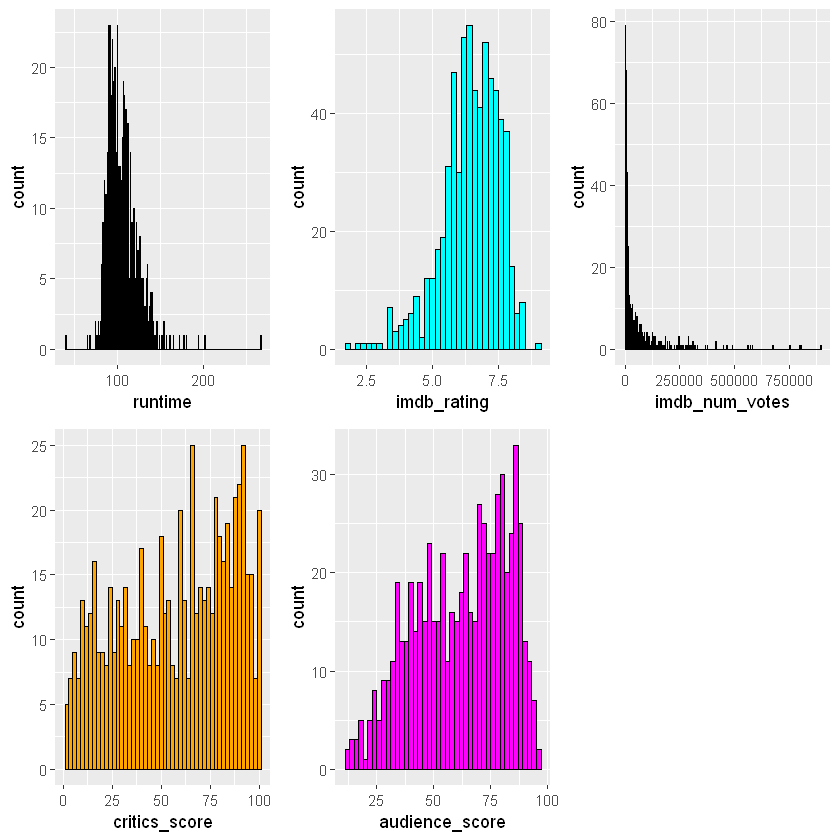

In [6]:
pA <- ggplot(data = mv, aes(x = runtime)) + geom_histogram(colour = "black", fill = "green", binwidth = .5)

pB <- ggplot(data = mv, aes(x = imdb_rating)) + geom_histogram(colour = "black", fill = "cyan", binwidth = .2)

pC <- ggplot(data = mv, aes(x = imdb_num_votes)) + geom_histogram(colour = "black", fill = "yellow", binwidth = 2000)

pD <- ggplot(data = mv, aes(x = critics_score)) + geom_histogram(colour = "black", fill = "orange", binwidth = 2)

pE <- ggplot(data = mv, aes(x = audience_score)) + geom_histogram(colour = "black", fill = "magenta", binwidth = 2)


grid.arrange(pA, pB, pC, pD, pE, nrow = 2, ncol = 3)

The plots above show that our explanatory variable audience_score is skewed to the left.

### Relationship Exploration: audience_score and the new variables

Response variable: numerical, Explanatory variable: categorical (2 levels)
n_no = 59, y_bar_no = 81.2034, s_no = 13.6404
n_yes = 591, y_bar_yes = 60.4653, s_yes = 19.824
(Assuming intrinsic prior on parameters)
Hypotheses:
H1: mu_no  = mu_yes
H2: mu_no != mu_yes

Priors:
P(H1) = 0.5 
P(H2) = 0.5 

Results:
BF[H2:H1] = 2.794604e+13
P(H1|data) = 0 
P(H2|data) = 1 


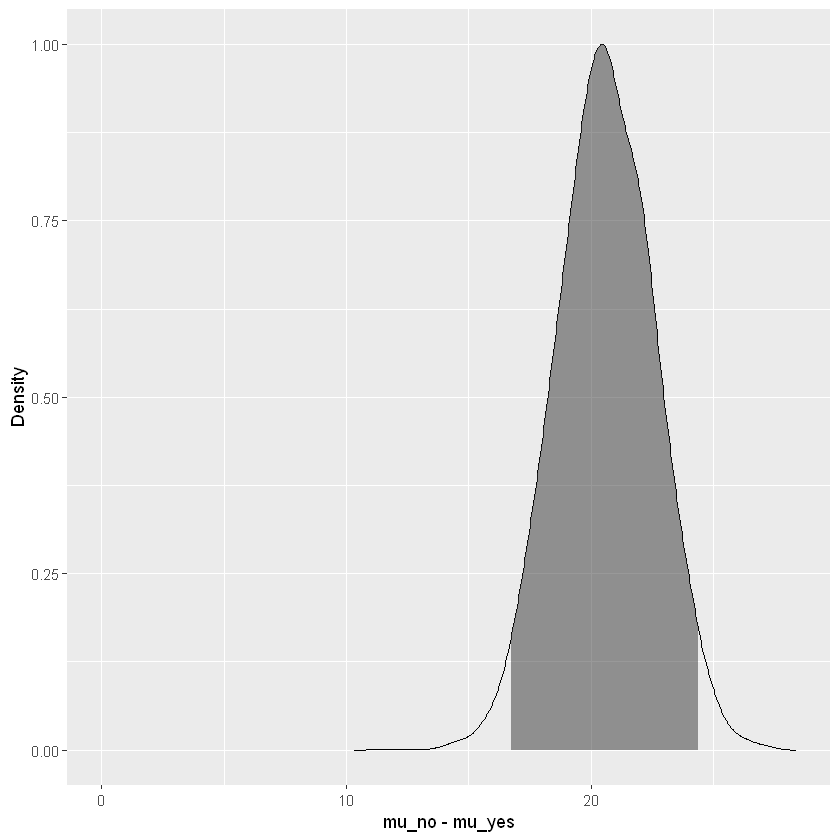

In [7]:
BI_1 <- bayes_inference(y = audience_score, x = feature_film, data = mv, statistic = "mean", type = "ht", null = 0, 
                        alternative = "twosided")

Faeture Film: Bayes factor of H2 against H1 also shows a strong evedience that feature film is significant in affecting final scores.

Response variable: numerical, Explanatory variable: categorical (2 levels)
n_no = 345, y_bar_no = 59.6957, s_no = 21.2981
n_yes = 305, y_bar_yes = 65.3475, s_yes = 18.5418
(Assuming intrinsic prior on parameters)
Hypotheses:
H1: mu_no  = mu_yes
H2: mu_no != mu_yes

Priors:
P(H1) = 0.5 
P(H2) = 0.5 

Results:
BF[H2:H1] = 24.1609
P(H1|data) = 0.0397 
P(H2|data) = 0.9603 


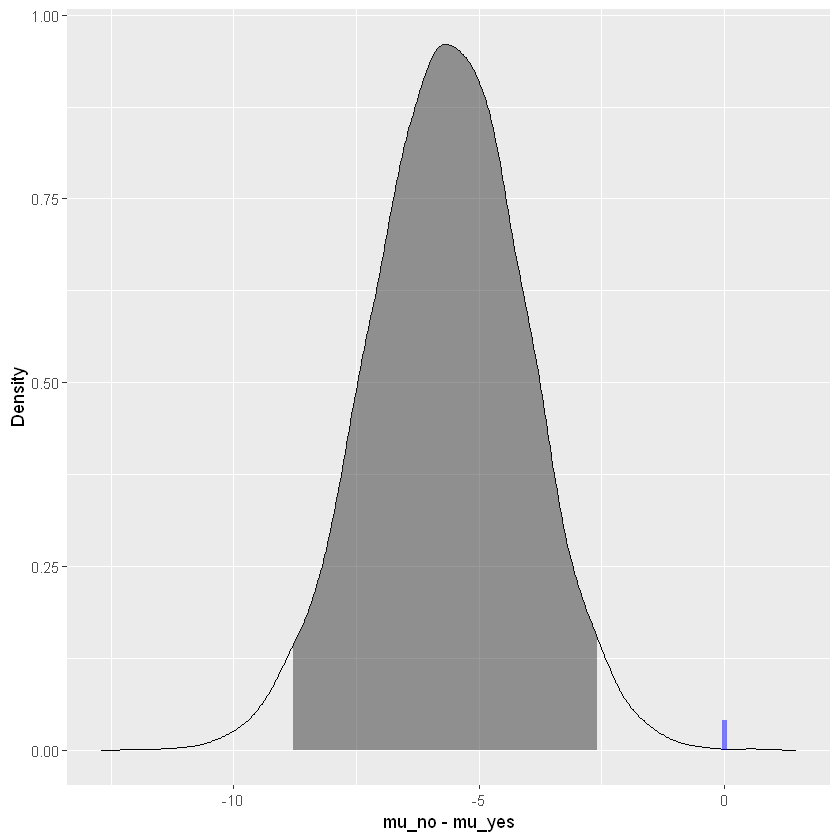

In [8]:
BI_2 <- bayes_inference(y = audience_score, x = drama, data = mv, statistic = "mean", type = "ht", null = 0, 
                        alternative = "twosided")

Drama: The bayesian factor is 24.2, showing a positive evidence of H2 against H1. It means drama genre definitely influences the final score.

Response variable: numerical, Explanatory variable: categorical (2 levels)
n_no = 321, y_bar_no = 62.6604, s_no = 20.3418
n_yes = 329, y_bar_yes = 62.0426, s_yes = 20.1559
(Assuming intrinsic prior on parameters)
Hypotheses:
H1: mu_no  = mu_yes
H2: mu_no != mu_yes

Priors:
P(H1) = 0.5 
P(H2) = 0.5 

Results:
BF[H1:H2] = 24.1282
P(H1|data) = 0.9602 
P(H2|data) = 0.0398 


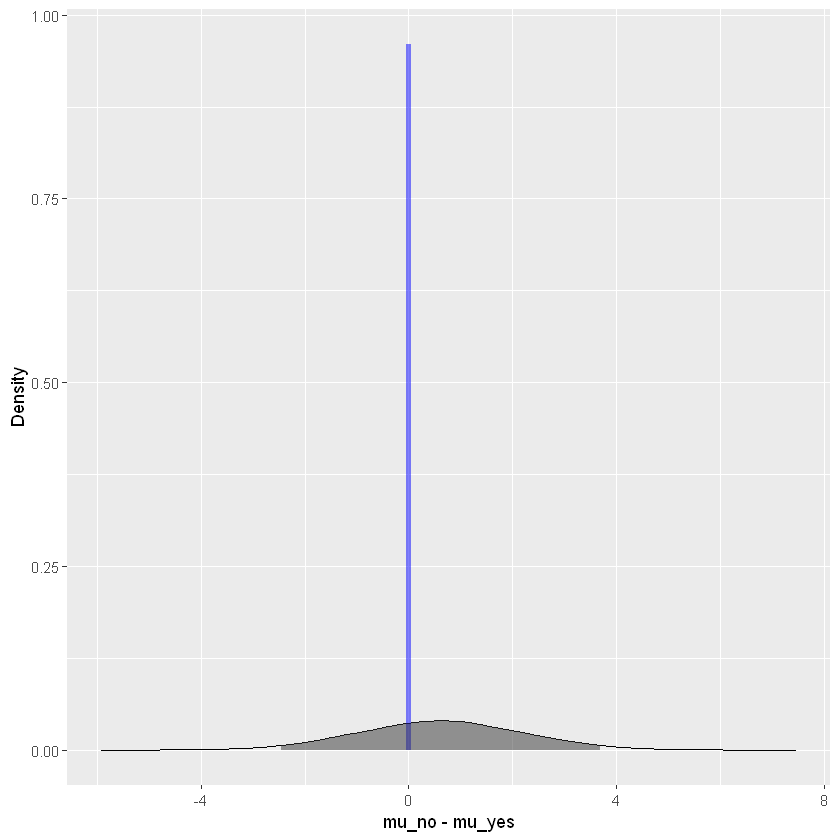

In [9]:
BI_3 <- bayes_inference(y = audience_score, x = mpaa_rating_R, data = mv, statistic = "mean", type = "ht", null = 0, 
                        alternative = "twosided")

R Rating: The bayesian factor is 24.1, showing a positive evidence of H1 against H2. It means that R rating cannot affect the final score.

Response variable: numerical, Explanatory variable: categorical (2 levels)
n_no = 460, y_bar_no = 61.813, s_no = 20.1196
n_yes = 190, y_bar_yes = 63.6421, s_yes = 20.5062
(Assuming intrinsic prior on parameters)
Hypotheses:
H1: mu_no  = mu_yes
H2: mu_no != mu_yes

Priors:
P(H1) = 0.5 
P(H2) = 0.5 

Results:
BF[H1:H2] = 13.7738
P(H1|data) = 0.9323 
P(H2|data) = 0.0677 


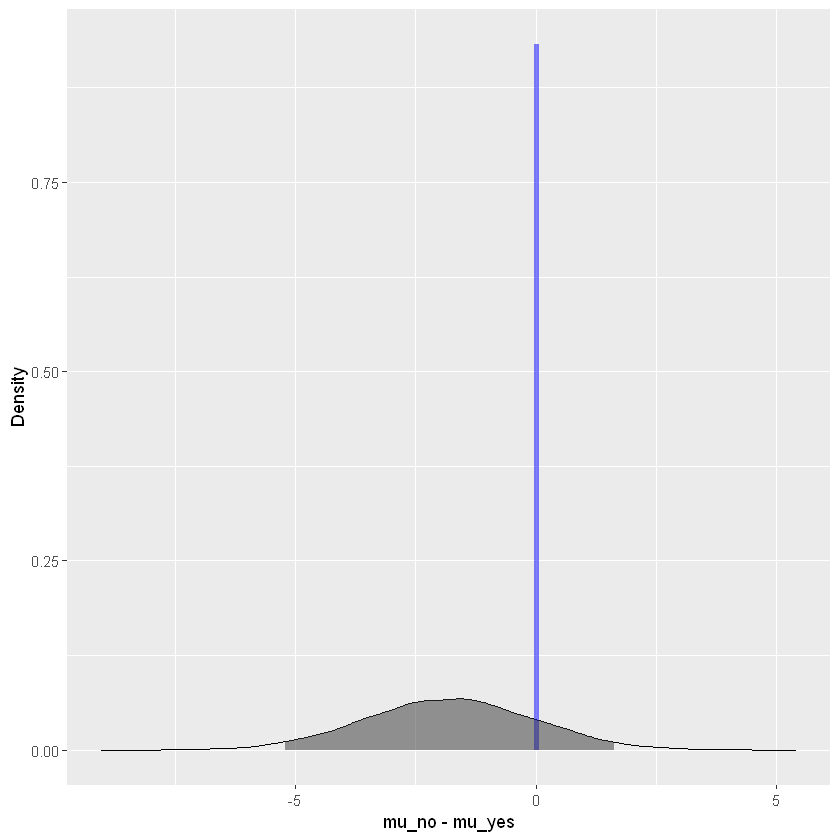

In [10]:
BI_4 <- bayes_inference(y = audience_score, x = oscar_season, data = mv, statistic = "mean", type = "ht", null = 0, 
                        alternative = "twosided")

Oscar Season: The bayesian factor is 13.7 with positive evidence of H1 against H2. The Oscar seasons cannot affect the final rating.

## Part 4: Modeling

We begin modelling exercise by selecting a full model, i.e, choose all avaliable variables to model the audience_score. Subsequently we remove variables from the model, one at a time, until BIC can not be lowered. 
This approach taakes as input: a full model, and a penalty parameter k. We find the best model according to BIC i.e. k=log(n).

In [11]:
library(MASS)


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




In [12]:
lm1 <- lm(audience_score ~ . - audience_score, data = mv)

summary(lm1)


Call:
lm(formula = audience_score ~ . - audience_score, data = mv)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.678  -6.068   0.154   5.937  53.078 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.232e+02  7.758e+01   1.588   0.1129    
feature_filmyes     -2.240e+00  1.689e+00  -1.327   0.1851    
dramayes             1.315e+00  8.785e-01   1.497   0.1348    
runtime             -5.575e-02  2.418e-02  -2.305   0.0215 *  
mpaa_rating_Ryes    -1.447e+00  8.132e-01  -1.779   0.0757 .  
thtr_rel_year       -7.594e-02  3.839e-02  -1.978   0.0484 *  
oscar_seasonyes     -5.287e-01  9.974e-01  -0.530   0.5962    
summer_seasonyes     9.319e-01  9.509e-01   0.980   0.3275    
imdb_rating          1.472e+01  6.071e-01  24.242   <2e-16 ***
imdb_num_votes       7.322e-06  4.529e-06   1.617   0.1065    
critics_score        5.717e-02  2.219e-02   2.577   0.0102 *  
best_pic_nomyes      5.572e+00  2.683e+00   2.077   0.0382 *  
best

In [13]:
score_step <- stepAIC(lm1, trace = FALSE)
score_step


Call:
lm(formula = audience_score ~ runtime + mpaa_rating_R + thtr_rel_year + 
    imdb_rating + critics_score + best_pic_nom + oscar, data = mv)

Coefficients:
     (Intercept)           runtime  mpaa_rating_Ryes     thtr_rel_year  
        69.80935          -0.04925          -1.45083          -0.05116  
     imdb_rating     critics_score   best_pic_nomyes          oscaryes  
        15.00591           0.06420           5.17354          -2.20722  


In [14]:
score_step$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,632,62967.44,3008.710
- top200_box,1,6.674593,633,62974.12,3006.779
- best_dir_win,1,7.686045,634,62981.80,3004.859
- best_actor_win,1,12.175084,635,62993.98,3002.984
- oscar_season,1,27.481580,636,63021.46,3001.268
- best_actress_win,1,44.705910,637,63066.16,2999.729
- best_pic_win,1,84.748302,638,63150.91,2998.602
- feature_film,1,170.096341,639,63321.01,2998.350
- drama,1,134.225070,640,63455.23,2997.726


The results above show that the final model is significantly different from the full model that we started with. Another interesting thing to note here is that the of the new features only mpaa_rating_R variable is left. And this is indeed in line with what we observed during exploratory analysis.

## Bayesian Model Averaging (BMA)

With several models, each being quite plausible, choosing only one ignores the inherent uncertainty involved in choosing the variables to include in the model. To adress this we implement Bayesian model averaging (BMA). Multiple models are averaged to obtain posteriors of coefficients and predictions from new data.

In [15]:
bma1 <- bas.lm(audience_score ~ . - audience_score, data = mv, prior = "BIC", modelprior = uniform())
bma1


Call:
bas.lm(formula = audience_score ~ . - audience_score, data = mv, 
    prior = "BIC", modelprior = uniform())


 Marginal Posterior Inclusion Probabilities: 
          Intercept      feature_filmyes             dramayes  
            1.00000              0.06138              0.04378  
            runtime     mpaa_rating_Ryes        thtr_rel_year  
            0.37964              0.19892              0.09127  
    oscar_seasonyes     summer_seasonyes          imdb_rating  
            0.07251              0.08029              1.00000  
     imdb_num_votes        critics_score      best_pic_nomyes  
            0.05744              0.89363              0.16890  
    best_pic_winyes    best_actor_winyes  best_actress_winyes  
            0.04030              0.10976              0.10897  
    best_dir_winyes        top200_boxyes             oscaryes  
            0.05773              0.04693              0.33032  

In [16]:
summary(bma1)

,P(B != 0 | Y),model 1,model 2,model 3,model 4,model 5
Intercept,1.00000000,1.0000,1.0000000,1.0000000,1.0000000,1.0000000
feature_filmyes,0.06138093,0.0000,0.0000000,0.0000000,0.0000000,0.0000000
dramayes,0.04378471,0.0000,0.0000000,0.0000000,0.0000000,0.0000000
runtime,0.37963551,1.0000,0.0000000,0.0000000,0.0000000,0.0000000
mpaa_rating_Ryes,0.19891935,0.0000,0.0000000,0.0000000,0.0000000,0.0000000
thtr_rel_year,0.09126583,0.0000,0.0000000,0.0000000,0.0000000,0.0000000
oscar_seasonyes,0.07251281,0.0000,0.0000000,0.0000000,0.0000000,0.0000000
summer_seasonyes,0.08029403,0.0000,0.0000000,0.0000000,0.0000000,0.0000000
imdb_rating,1.00000000,1.0000,1.0000000,1.0000000,1.0000000,1.0000000
imdb_num_votes,0.05743553,0.0000,0.0000000,0.0000000,0.0000000,0.0000000


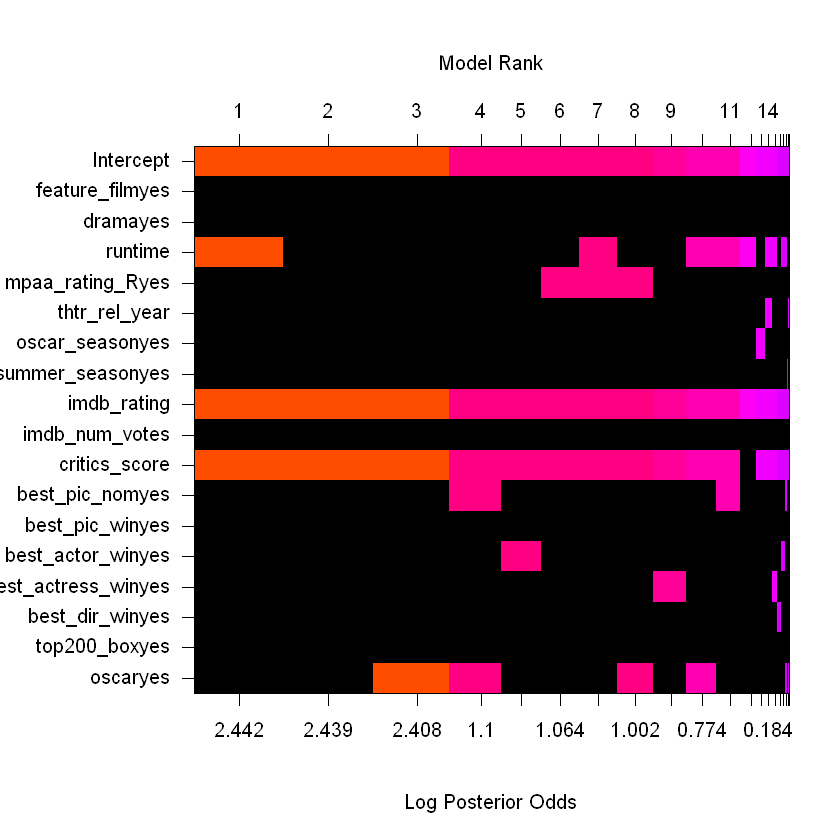

In [17]:
image(bma1,rotate=FALSE)

By looking at the image, we can see that the best model is the one with `runtime`, `imdb_rating`, `critics_score`.

### Model Diagnostics

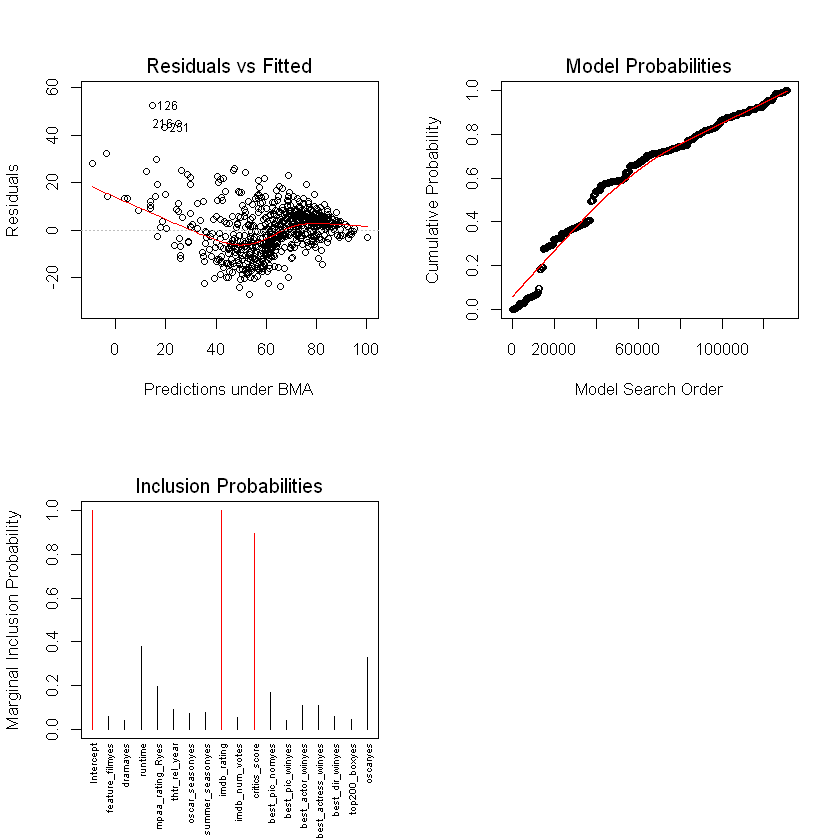

In [18]:
par(mfrow=c(2,2))

plot(bma1, which=c(1, 2), ask=FALSE)

plot(bma1, which=4, ask=FALSE, cex.lab=0.5)

## Part 5: Prediction

The predictive capability of bayesian model averaging was tested using data for a movie that was not included in the analysis data set. The movie chosen was Deadpool which was released early in 2016.  The information for this movie was obtained from the IMDb and Rotten Tomatoes web sites in order to be consistent with the analysis data.

In [19]:
Deadpool <- data.frame(runtime=108,
                         thtr_rel_year=2016,
                         imdb_rating=8.1,
                         imdb_num_votes=500049,
                         critics_score=84,
                         audience_score=0,
                         best_pic_nom=factor("no", levels=c("no", "yes")),
                         best_pic_win=factor("no", levels=c("no", "yes")),
                         best_actor_win=factor("no", levels=c("no", "yes")),
                         best_actress_win=factor("no", levels=c("no", "yes")),
                         best_dir_win=factor("no", levels=c("no", "yes")),
                         top200_box=factor("no", levels=c("no", "yes")),
                         feature_film=factor("yes", levels=c("no", "yes")),
                         drama=factor("no", levels=c("no", "yes")),
                         mpaa_rating_R=factor("yes", levels=c("no", "yes")),
                         oscar_season=factor("no", levels=c("no", "yes")),
                         summer_season=factor("no", levels=c("no", "yes")),
                         oscar = factor("no", levels=c("no", "yes")))

BMA_DP <- predict(bma1, newdata=Deadpool, estimator="BMA", se.fit=TRUE)

In [20]:
# Calculate 95% margin of error for the prediction interval.

BMA_DP_pred <- qt(0.95, df=BMA_DP$se.bma.pred[1]) * mean(BMA_DP$se.bma.pred)
BMA_DP_pred

[1] 18.30361

In [21]:
# Show prediction results.
df <- data.frame(t="Deadpool",
                 p=sprintf("%2.1f", BMA_DP$Ybma),
                 i=sprintf("%2.1f - %2.1f", BMA_DP$Ybma - BMA_DP_pred,
                           BMA_DP$Ybma + BMA_DP_pred),
                 r=84)
colnames(df) <- c("Movie Title", "Predicted Rating", "95% Prediction Interval", 
                  "Actual Rating")
print(df)

  Movie Title Predicted Rating 95% Prediction Interval Actual Rating
1    Deadpool             88.1            69.8 - 106.4            84


The true audience score for the movie is 84. The model prediction is 88 with a 95% prediction interval of 69.8 to 106.4.

## Part 6: Conclusion
The relationship between audience score and the varaibles in movies dataset was analysed in project. An Exploratory Data Analysis was performed for the five derived variables. A Bayesian Information criterion backwards elimination produced a model that was scrutinized using Bayesian Posterior Probabilities. The model was used to predict score of a recent Movie and the results were positive with the predicted score close to the actual score, and the actual scoore within the 95% connfidence interval.